# **INTRODUCCIÓN**

El presente estudio tiene como propósito analizar la evolución del consumo de energía per cápita en los países de América del Sur durante el período 1980–2013, así como su relación con el Producto Interno Bruto (PIB) per cápita, considerado un indicador representativo del nivel de desarrollo económico. Este enfoque permitirá examinar si el crecimiento económico de la región ha estado acompañado de un aumento proporcional en el uso de energía, o si, por el contrario, existen patrones de eficiencia y desigualdad entre los países.

In [42]:
### para exportar pdf sin celdas de codigo, ejecutar en el cmd del sistema:

## cd C:\Users\User\Desktop\RICARDO UNIVERSIDAD\Equipo-4-computacion-II\Informe Dinámico

### python -m jupyter nbconvert --to pdf --template latex --no-input informe.ipynb

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# **Primeras 10 filas de la base de datos:**

In [44]:
csv = ('https://raw.githubusercontent.com/arb28/Equipo'
       '-4-computacion-II/refs/heads/main/Limpieza%20de%20datos/Datos.csv')

df = pd.read_csv(csv)

#lista de países seleccionados
paises_seleccionados = [
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia",
    "Ecuador", "Paraguay", "Peru", "Uruguay", "Venezuela"
]

#filtrar el DataFrame para conservar solo esos países
df = df[df["País"].isin(paises_seleccionados)]

#reiniciar el índice 
df = df.reset_index(drop=True).round(2)
df1 = df.astype(str)
#mostrar primeras 10 filas del csv
df1.head(10)

,Código,País,Año,Energía per cápita,PIB per cápita
0,ARG,Argentina,1980,1491.92,nan
1,ARG,Argentina,1981,1434.06,nan
2,ARG,Argentina,1982,1420.03,nan
3,ARG,Argentina,1983,1423.68,3727.05
4,ARG,Argentina,1984,1452.12,3787.47
5,ARG,Argentina,1985,1365.23,2919.28
6,ARG,Argentina,1986,1426.58,3454.3
7,ARG,Argentina,1987,1482.25,3492.69
8,ARG,Argentina,1988,1509.79,4005.2
9,ARG,Argentina,1989,1445.86,2382.34


# **Descripción de la evolución del consumo de energía per cápita en los países de América del Sur entre 1980 y 2013.**

In [45]:
#filtrado para ver el promedio de energía per capita en los años seleccionados
desc = df.groupby("Año")["Energía per cápita"].mean().reset_index().round(2)


pd.set_option('display.notebook_repr_html', True)

def _repr_latex_(self):
    return "{%s}" % self.to_latex()

pd._repr_latex_ = _repr_latex_ 

years_list = [1980, 1990, 2000, 2010]

desc = desc.query('Año in @years_list')
desc1 = desc.astype(str)
desc1

,Año,Energía per cápita
0,1980,932.91
10,1990,903.21
20,2000,1054.12
30,2010,1241.53


En esta tabla donde se ve el promedio de energía per cápita media en Kg de petróleo, en las decadas respectivas para visualizar mejor el progreso de esta medida, podemos ver que aumenta a medida que los años pasan, evidentemente. Sin embargo, en el siguiente gráfico de lineas podemos apreciarlo mejor:

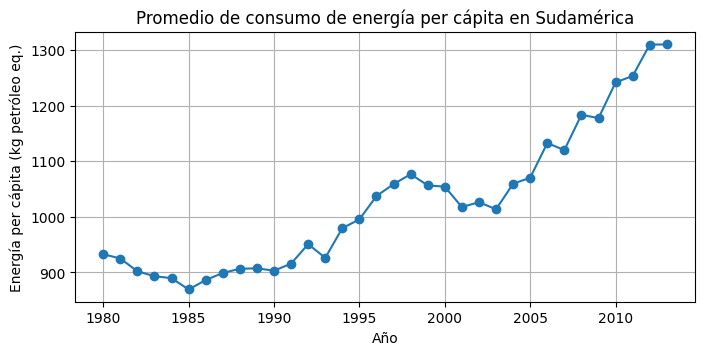

In [46]:

# Gráfico de tendencia temporal (promedio anual)
df.groupby("Año")["Energía per cápita"].mean().plot(figsize=(8,3.5), marker="o")
plt.title("Promedio de consumo de energía per cápita en Sudamérica")
plt.ylabel("Energía per cápita (kg petróleo eq.)")
plt.grid(True)
plt.show()

- Se aprecia una tendencia alcista, con ciertos altibajos en el consumo.
- De esta extensión de años, en donde hubo un mayor consumo promedio de energía per cápita, fue en 2012.
- Asimismo, el menor consumo promedio se presentó en 1985.

En el siguiente gráfico vemos este promedio de consumo de energía per cápita, pero por país:

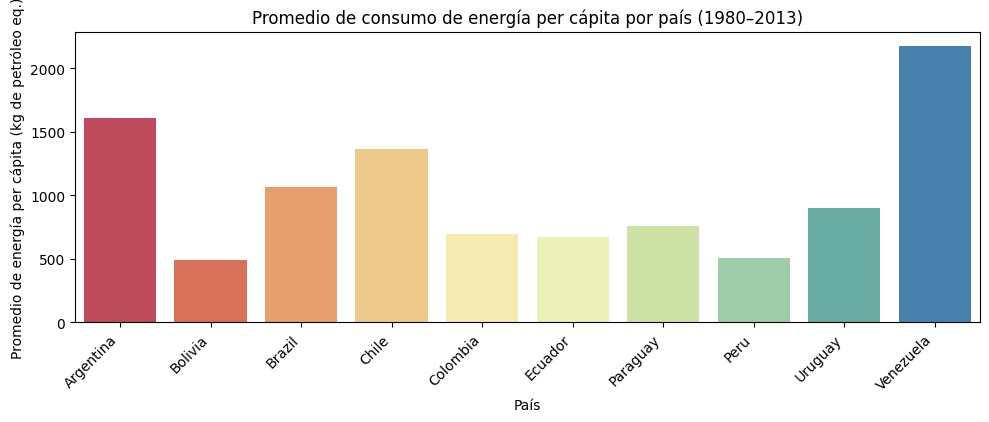

In [47]:
promedios = df.groupby("País")["Energía per cápita"].mean().reset_index()

plt.figure(figsize=(10, 4.33))
sns.barplot(
    x="País",
    y="Energía per cápita",
    data=promedios,
    hue="País",
    palette="Spectral"
)
plt.title("Promedio de consumo de energía per cápita por país (1980–2013)")
plt.ylabel("Promedio de energía per cápita (kg de petróleo eq.)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



- Venezuela es el país que, en promedio, posee mayor consumo de energía por habitante, fijandonos en todos los años estudiados.
- Yendonos al estudio de los ultimos 10 años, no cambia mucho el panorama:

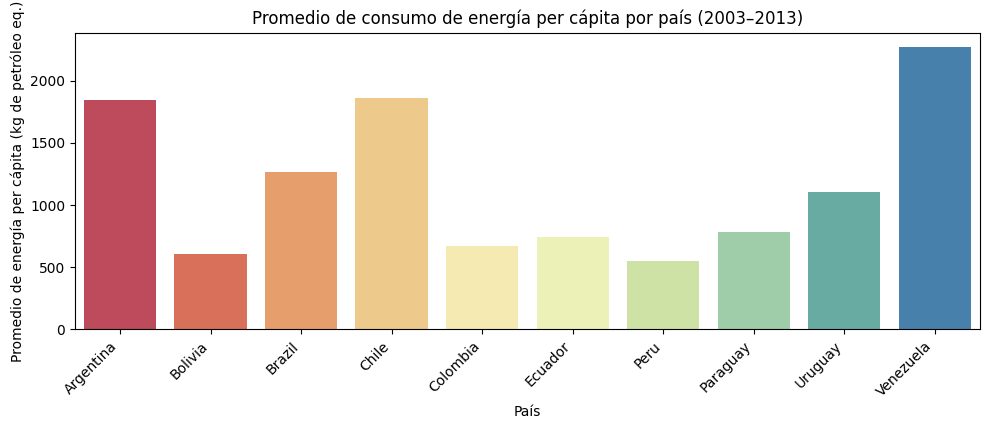

In [48]:
#filtrar últimos 10 años
años10 = [2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013]
df2 = df[df["Año"].isin(años10)]

#creación del gráfico
plt.figure(figsize=(10, 4.39))
sns.barplot(
    x="País",
    y="Energía per cápita",
    data=df2,
    hue="País",
    palette='Spectral',
    errorbar=None
)
plt.title("Promedio de consumo de energía per cápita por país (2003–2013)")
plt.ylabel("Promedio de energía per cápita (kg de petróleo eq.)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# **Comparación de los niveles promedio de consumo de energía per cápita entre los países sudamericanos, relacionando estas diferencias con el nivel de desarrollo económico.**

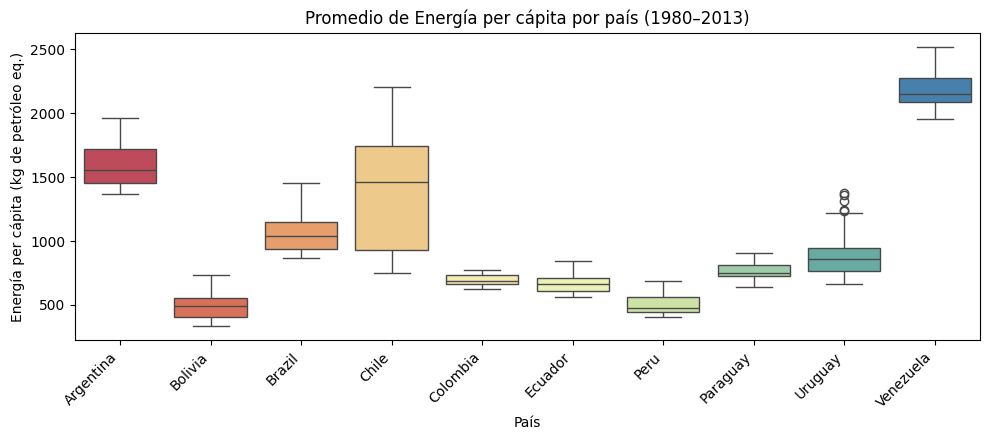

In [49]:
plt.figure(figsize=(10, 4.5))
sns.boxplot(
    x="País",
    y="Energía per cápita",
    data=df,
    hue="País",
    palette='Spectral'
)
plt.title("Promedio de Energía per cápita por país (1980–2013)")
plt.ylabel("Energía per cápita (kg de petróleo eq.)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

- El diagrama de cajas muestra la dispersión del consumo de energía per cápita para cada país sudamericano entre 1980 y 2013. 
- Se observa que países como Venezuela, Brazil y Argentina presentan medianas más elevadas y menor variabilidad, mientras que Bolivia y Paraguay muestran valores más bajos.
- La presencia de valores atípicos indica años con consumos excepcionalmente altos, como sucede en Uruguay.


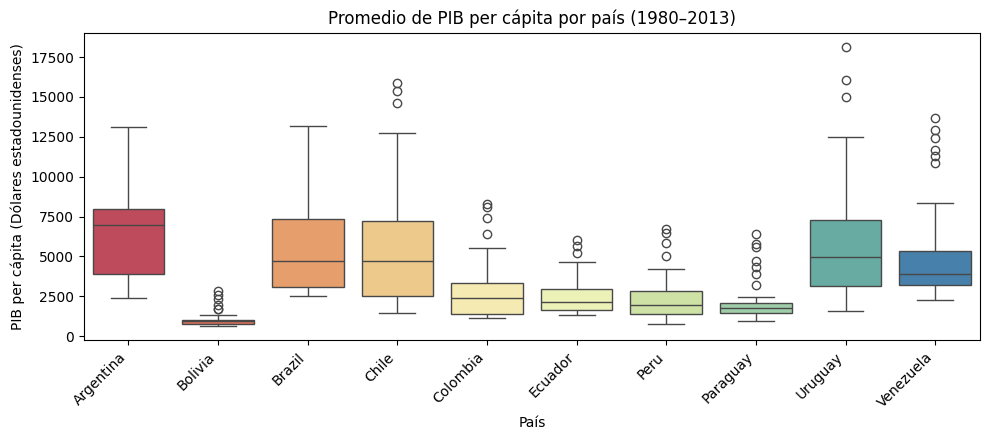

In [50]:
plt.figure(figsize=(10, 4.5))
sns.boxplot(
    x="País",
    y="PIB per cápita",
    data=df,
    hue="País",
    palette='Spectral'
)
plt.title("Promedio de PIB per cápita por país (1980–2013)")
plt.ylabel("PIB per cápita (Dólares estadounidenses)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

- Analizando este gráfico con el anterior, podemos ver que, aunque Venezuela presenta el mayor consumo de la región, su PIB no es de los más altos.
- Caso contrario a Argentina, que si posee uno de los mejores PIB, asi como es uno de los paises con mayor consumo de energía per cápita.
- Además, vemos como Uruguay en años determinados pudo ser el país con el mayor PIB per cápita de la región, aunque no fue asi necesariamente cuando medimos su consumo de energía por habitante.

# **Analisis de la correspondencia entre el crecimiento del PIB per cápita y el consumo de energía per cápita**

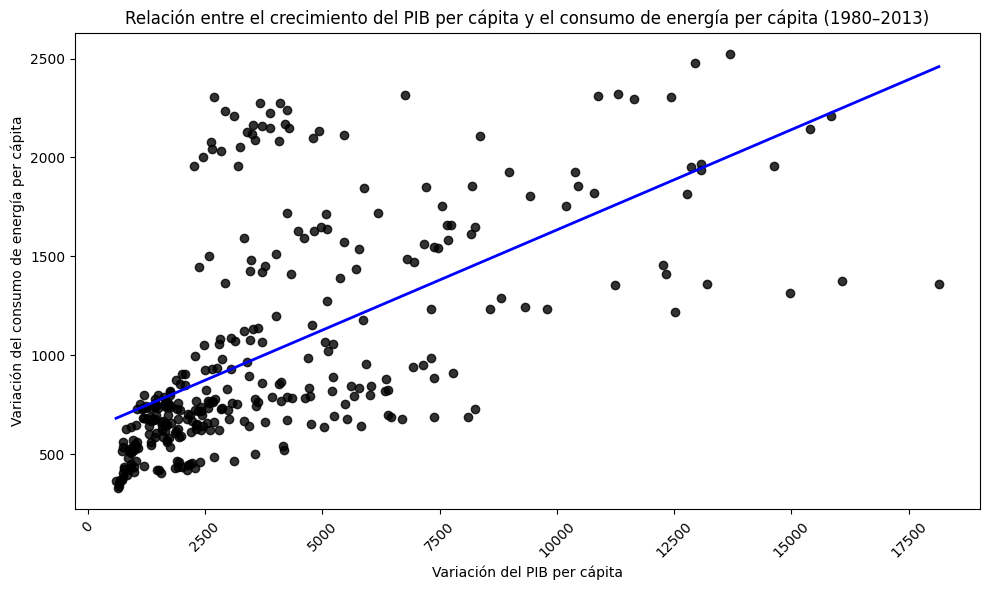

In [51]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, 
    x="PIB per cápita", 
    y="Energía per cápita",
    scatter_kws={'color': 'black'}, 
    line_kws={'color': 'blue', 'lw': 2},
    ci=None
)

# Título y etiquetas
plt.title("Relación entre el crecimiento del PIB per cápita y el consumo de energía per cápita (1980–2013)")
plt.xlabel("Variación del PIB per cápita")
plt.ylabel("Variación del consumo de energía per cápita")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El análisis de las variaciones entre el PIB per cápita y el consumo de energía per cápita muestra una correlación positiva moderada, lo que sugiere que los países con un mayor crecimiento económico tienden a consumir más energía. Sin embargo, la dispersión de los puntos en el gráfico indica que hay países donde el crecimiento económico no se traduce directamente en un aumento del consumo energético, lo que puede reflejar mejoras en eficiencia energética o un cambio hacia una economía menos intensiva en energía.


In [52]:
correlacion = df[["PIB per cápita", "Energía per cápita"]].corr().round(3)

# Mostrar el valor de la correlación
print("Correlación entre el crecimiento del PIB y el consumo de energía:")
correlacion = correlacion.astype(str)
correlacion

Correlación entre el crecimiento del PIB y el consumo de energía:


,PIB per cápita,Energía per cápita
PIB per cápita,1.0,0.604
Energía per cápita,0.604,1.0


Este valor indica una correlación lineal moderada. Esto significa que, en promedio, cuando el PIB per cápita de un país aumenta, también tiende a aumentar su consumo de energía per cápita.

Sin embargo, al no ser una correlación fuerte, el crecimiento económico no siempre implica un aumento proporcional del consumo energético. Por lo que:

- Algunos países pueden haber mejorado su eficiencia energética (creciendo económicamente sin consumir mucha más energía).

- Otros pueden seguir dependiendo de modelos productivos intensivos en energía, donde el crecimiento económico va de la mano con un alto consumo energético.
